In [40]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

In [41]:
os.environ["OMP_NUM_THREADS"] = "1"

In [42]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [43]:
print("Customers Data:")
print(customers.head())
print("\nTransactions Data:")
print(transactions.head())

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [44]:
merged_data = transactions.merge(customers, on='CustomerID')

In [45]:
features = merged_data.groupby('CustomerID').agg({
    'Quantity': 'sum',              
    'TotalValue': 'sum',                         
}).reset_index()

print("Customer Features:")
print(features.head())

Customer Features:
  CustomerID  Quantity  TotalValue
0      C0001        12     3354.52
1      C0002        10     1862.74
2      C0003        14     2725.38
3      C0004        23     5354.88
4      C0005         7     2034.24


In [46]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features[['Quantity', 'TotalValue']])


In [47]:
db_indices = []
silhouette_scores = []
cluster_range = range(2, 11)  

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(features_scaled)
    features['Cluster'] = kmeans.labels_
    db_index = davies_bouldin_score(features_scaled, features['Cluster'])
    silhouette_avg = silhouette_score(features_scaled, features['Cluster'])
    db_indices.append(db_index)
    silhouette_scores.append(silhouette_avg)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

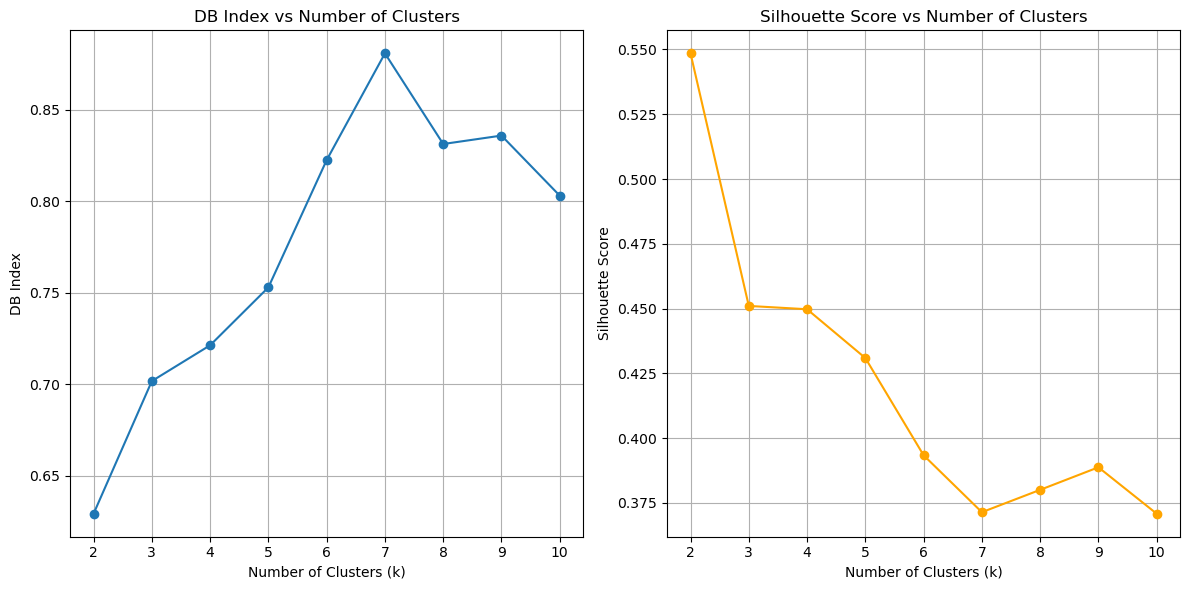

Number of Clusters: 2, DB Index: 0.63, Silhouette Score: 0.55
Number of Clusters: 3, DB Index: 0.70, Silhouette Score: 0.45
Number of Clusters: 4, DB Index: 0.72, Silhouette Score: 0.45
Number of Clusters: 5, DB Index: 0.75, Silhouette Score: 0.43
Number of Clusters: 6, DB Index: 0.82, Silhouette Score: 0.39
Number of Clusters: 7, DB Index: 0.88, Silhouette Score: 0.37
Number of Clusters: 8, DB Index: 0.83, Silhouette Score: 0.38
Number of Clusters: 9, DB Index: 0.84, Silhouette Score: 0.39
Number of Clusters: 10, DB Index: 0.80, Silhouette Score: 0.37


In [48]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, db_indices, marker='o')
plt.title('DB Index vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('DB Index')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

for k, db_index, silhouette in zip(cluster_range, db_indices, silhouette_scores):
    print(f'Number of Clusters: {k}, DB Index: {db_index:.2f}, Silhouette Score: {silhouette:.2f}')

In [51]:
optimal_k = 2
kmeans_final = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
features['Cluster'] = kmeans_final.fit_predict(features_scaled)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


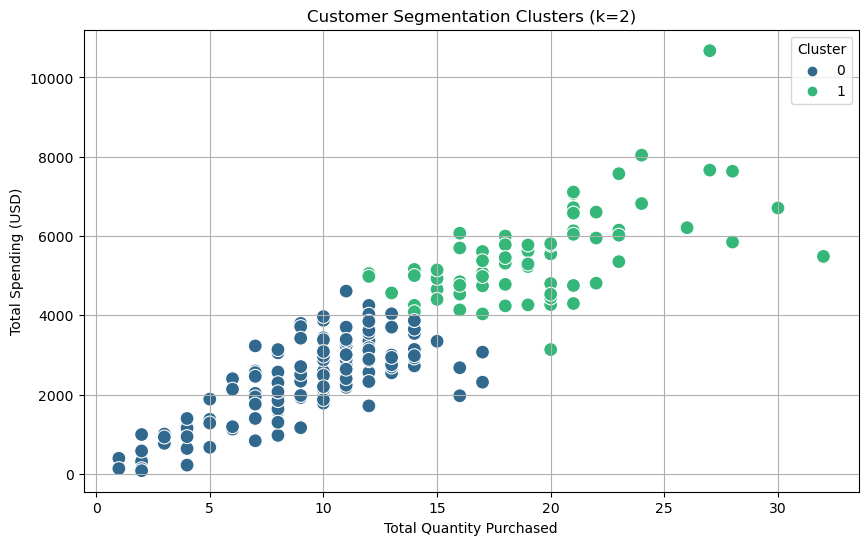

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=features, x='Quantity', y='TotalValue', hue='Cluster', palette='viridis', s=100)
plt.title(f'Customer Segmentation Clusters (k={optimal_k})')
plt.xlabel('Total Quantity Purchased')
plt.ylabel('Total Spending (USD)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()